In [1]:
#Some nice code to plot MODIS in a zoomable way courtesy of Friedrich Knuth
import rasterio
import hvplot
import hvplot.xarray
import xarray as xr
dem_fn = '/home/jovyan/shared/data-overcast/modis/modis_output_test_GDALwarp.tif'
src = rasterio.open(dem_fn)
da = xr.open_rasterio(src)
subplot_width  = int(src.shape[1] /9)
subplot_height = int(src.shape[0] /10)
da.sel(band=1).hvplot.image(rasterize=True,
                            width=subplot_width,
                            height=subplot_height,
                            cmap='gray')

:DynamicMap   []
   :Image   [x,y]   (value)

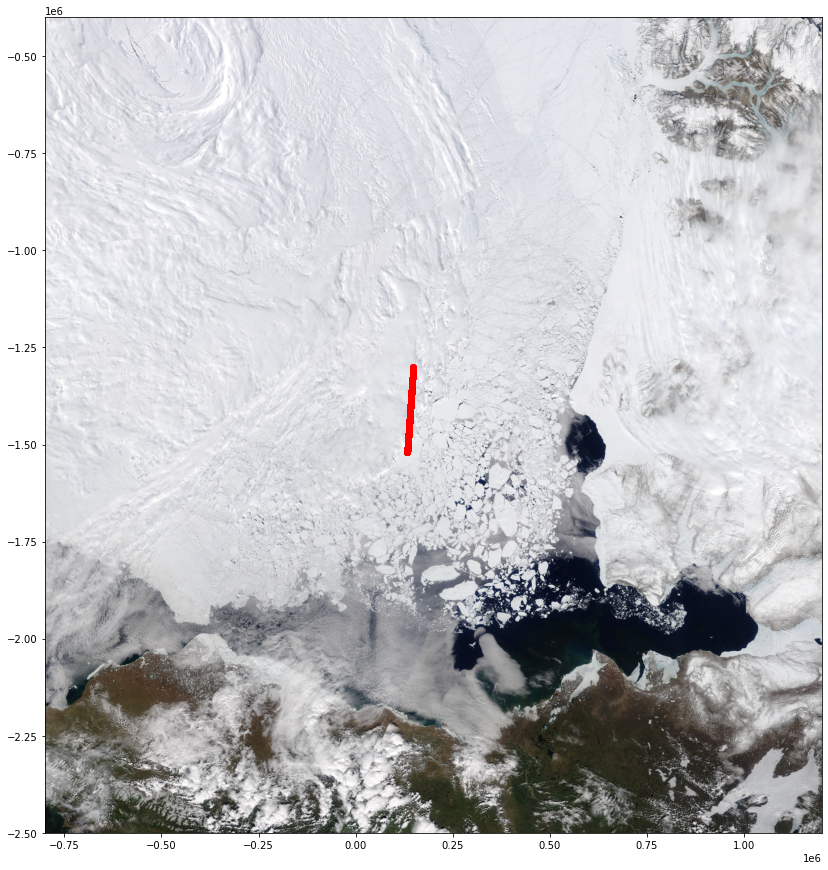

In [3]:
#Some code from Kyle overlay IS2 + MODIS (need to check how precise/correct projections are)
#Also how would that work for the already reprojected image by Axel modis_output_test_GDALwarp.tif?
import rasterio
import rasterio.plot
import hvplot
import hvplot.xarray
import xarray as xr
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pyproj import Proj

f = h5py.File('/home/jovyan/shared/data-overcast/BEAUFORT/ATL07/processed_ATL07-01_20190610013526_11120301_003_02.h5','r+')
sc_orient = f["orbit_info"]["sc_orient"][:]
if (sc_orient[0] == 0):
    beam = "gt2l"
elif (sc_orient[0] == 1):
    beam = "gt2r"
lon = f[beam]["sea_ice_segments"]["longitude"][:]
lat = f[beam]["sea_ice_segments"]["latitude"][:]
seg_h = f[beam]["sea_ice_segments"]["heights"]["height_segment_height"][:]
granule_lon = np.where(np.logical_and(lon >= -150.0,lon <= -110.0))[0]
granule_lat = np.where(np.logical_and(lat >= 75.0,lat <= 78.0))[0]
same = np.intersect1d(granule_lon,granule_lat)
lon_final = lon[same]
lat_final = lat[same]
seg_h_final = seg_h[same]
outProj = Proj("+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-145 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")
x, y = outProj(lon_final, lat_final)
dem_fn = '/home/jovyan/shared/data-overcast/modis/modis_output_test.tif'
#dem_fn = '/home/jovyan/shared/data-overcast/modis/modis_output_test_GDALwarp.tif'
src = rasterio.open(dem_fn)
#da = xr.open_rasterio(src)
#subplot_width  = int(src.shape[1] /9)
#subplot_height = int(src.shape[0] /10)
#da.sel(band=1).hvplot.image(rasterize=True,width=subplot_width,height=subplot_height,cmap='gray')
fig, ax = plt.subplots(figsize=(15, 15))

# zoomed_extent = [0, 3e5, -1.55e6, -1.25e6]
# #zoomed_extent = [0.13e6, 0.15e6, -1.42e6, -1.4e6]

# ax.set_xlim(zoomed_extent[0], zoomed_extent[1])
# ax.set_ylim(zoomed_extent[2], zoomed_extent[3])

vmin=0
vmax=1
rasterio.plot.show(src, ax=ax)
#ax.plot(x[:],y[:],seg_h_final[:],'ro')
ax.plot(x,y,'ro')
#plt.scatter(x[:],y[:],seg_h_final[:], cmap='viridis', vmin=vmin,vmax=vmax,transform=ccrs.PlateCarree())
#plt.scatter(x[:],y[:],seg_h_final[:], vmin=vmin,vmax=vmax)

# plt.scatter(df03['lons'][::1000], df03['lats'][::1000],c=df03[var][::1000], cmap='viridis', vmin=vmin,vmax=vmax,transform=ccrs.PlateCarree())



In [16]:
import rasterio
import hvplot
import hvplot.xarray
import xarray as xr
from utils import transform_coord


#Read MODIS
dem_fn = '/home/jovyan/shared/data-overcast/modis/modis_output_test_GDALwarp.tif'
src = rasterio.open(dem_fn)
da = xr.open_rasterio(src)
subplot_width  = int(src.shape[1] /9)
subplot_height = int(src.shape[0] /10)
da.sel(band=1).hvplot.image(rasterize=True,
                            width=subplot_width,
                            height=subplot_height,
                            cmap='gray')

#The code below does not really work with the code above. What I would like is for the IS2 data to be zoomable


#Read IS2
f = h5py.File('/home/jovyan/shared/data-overcast/BEAUFORT/ATL07/processed_ATL07-01_20190610013526_11120301_003_02.h5','r+')
sc_orient = f["orbit_info"]["sc_orient"][:]
if (sc_orient[0] == 0):
    beam = "gt2l"
elif (sc_orient[0] == 1):
    beam = "gt2r"
lon = f[beam]["sea_ice_segments"]["longitude"][:]
lat = f[beam]["sea_ice_segments"]["latitude"][:]
seg_h = f[beam]["sea_ice_segments"]["heights"]["height_segment_height"][:]


#reproject lon,lat of IS2 onto MODIS grid
x, y = transform_coord(4326, 3413, lon, lat)
plt.plot(x,y,'ro')



:DynamicMap   []
   :Image   [x,y]   (value)

In [10]:
x

array([-1086276.36760942, -1086276.36760942, -1086276.36760942, ...,
       -1520291.3333765 , -1520299.36423765, -1520307.84679338])